### 1. Import the necessary libs

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from prophet import Prophet
import sys
import os

### 2. Load the dataframes one by one

In [3]:
path_of_files = r"C:\Users\yusuf\OneDrive\Desktop\Forex Project\processed"

def load_dataFrames():
    csv_files = [file for file in os.listdir(path_of_files) if file.endswith(".csv") and os.path.isfile(os.path.join(path_of_files, file))]
    ## from the previous data preperation part we have seen that pyspark is actually not a good idea to use when we have pandas so I will directly take them as pandas DataFrames.
    pd_dfs = {}
    for file in csv_files:
        file_path = os.path.join(path_of_files, file)
        file_name = os.path.splitext(file)[0]
        pd_dfs[file_name] = pd.read_csv(file_path)
    return pd_dfs
pd_dfs = load_dataFrames()

### 3. Run the base prophet model to try the model

Fitting Prophet model for EURUSD_M1_processed...


09:02:28 - cmdstanpy - INFO - Chain [1] start processing
09:04:05 - cmdstanpy - INFO - Chain [1] done processing


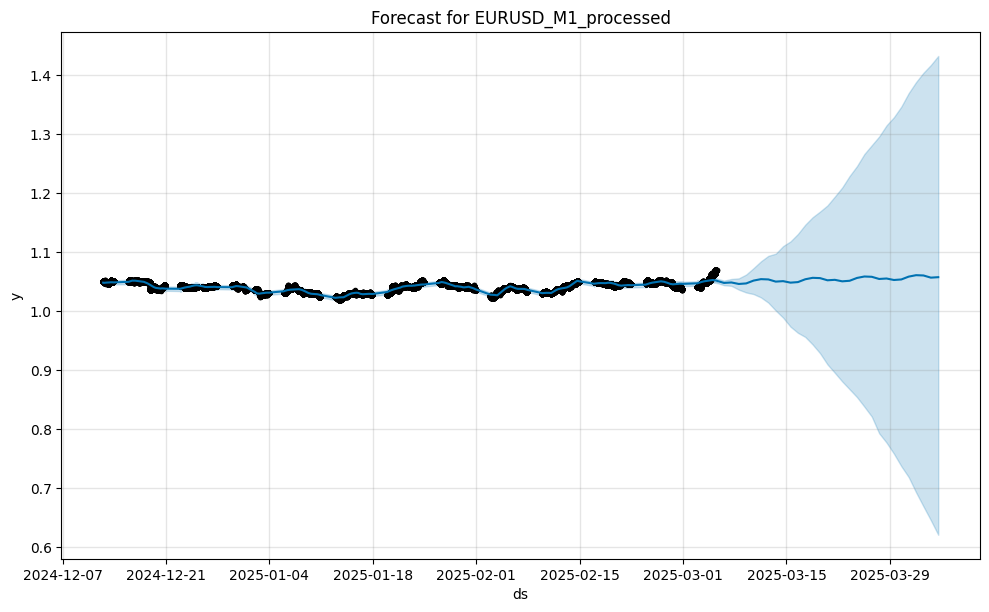

Fitting Prophet model for GBPUSD_M1_processed...


09:04:23 - cmdstanpy - INFO - Chain [1] start processing
09:06:09 - cmdstanpy - INFO - Chain [1] done processing


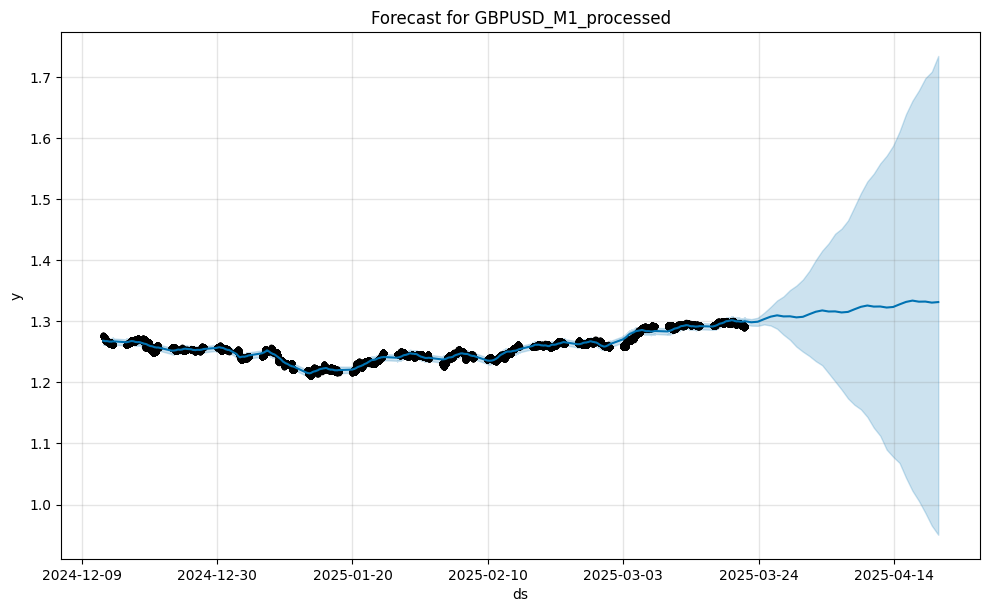

Fitting Prophet model for USDCAD_M1_processed...


09:06:32 - cmdstanpy - INFO - Chain [1] start processing
09:07:49 - cmdstanpy - INFO - Chain [1] done processing


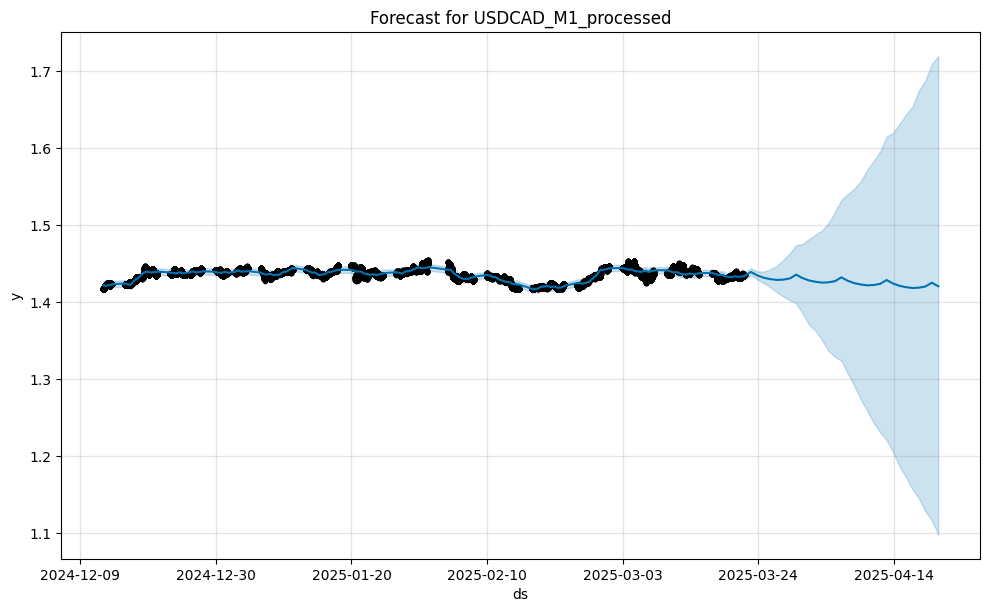

Fitting Prophet model for USDCHF_M1_processed...


09:08:08 - cmdstanpy - INFO - Chain [1] start processing
09:10:33 - cmdstanpy - INFO - Chain [1] done processing


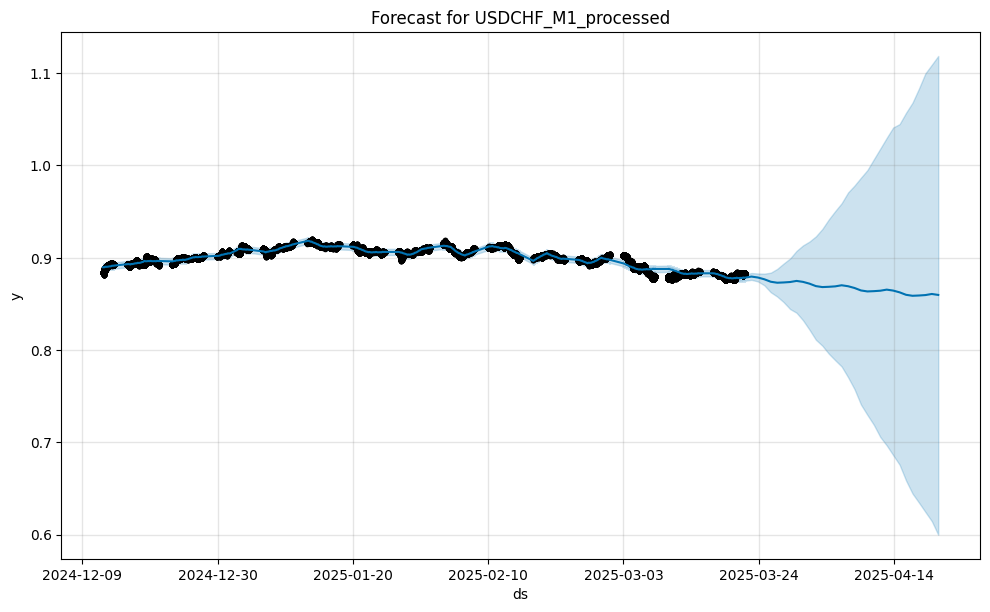

In [4]:
# we will first try the very beginner prophet model with close as the y and date as the ds parameter.

for name, file in pd_dfs.items():
    if 'Time' in file.columns:
        df_prophet = pd.DataFrame({
            'ds': pd.to_datetime(file["Time"]),
            'y': file["Close"]
        })

        print(f"Fitting Prophet model for {name}...")
        model = Prophet()
        model.fit(df_prophet)

        future = model.make_future_dataframe(periods=30)
        forecast = model.predict(future)
        
        fig = model.plot(forecast)
        plt.title(f"Forecast for {name}")
        plt.show()
    else:
        print(f"Error: No date column found in {name} dataset")

### 4. Expand the model with regressors

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:10:52 - cmdstanpy - INFO - Chain [1] start processing
09:12:08 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


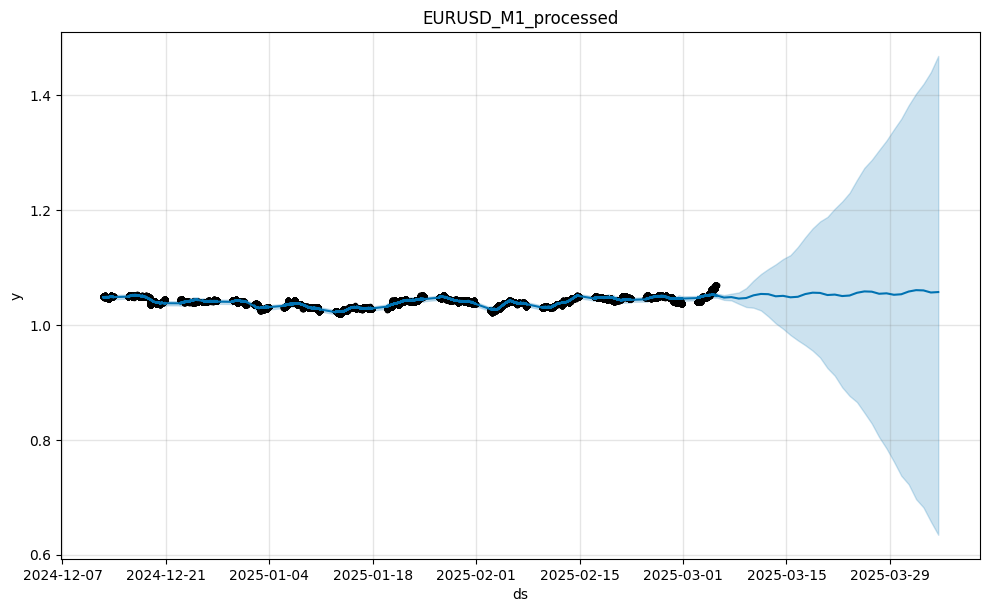

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:12:27 - cmdstanpy - INFO - Chain [1] start processing
09:14:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


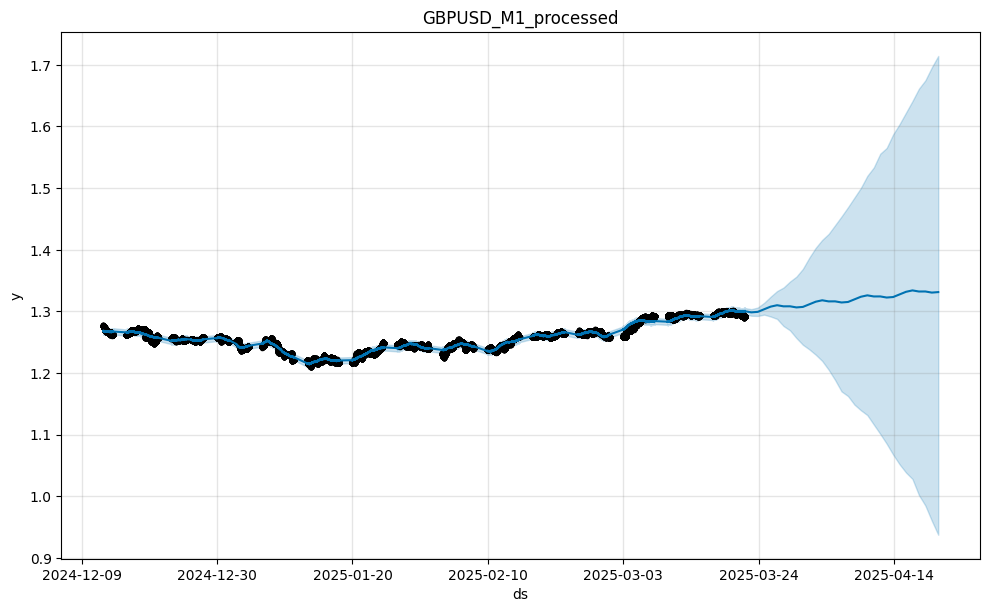

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:14:50 - cmdstanpy - INFO - Chain [1] start processing
09:16:50 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


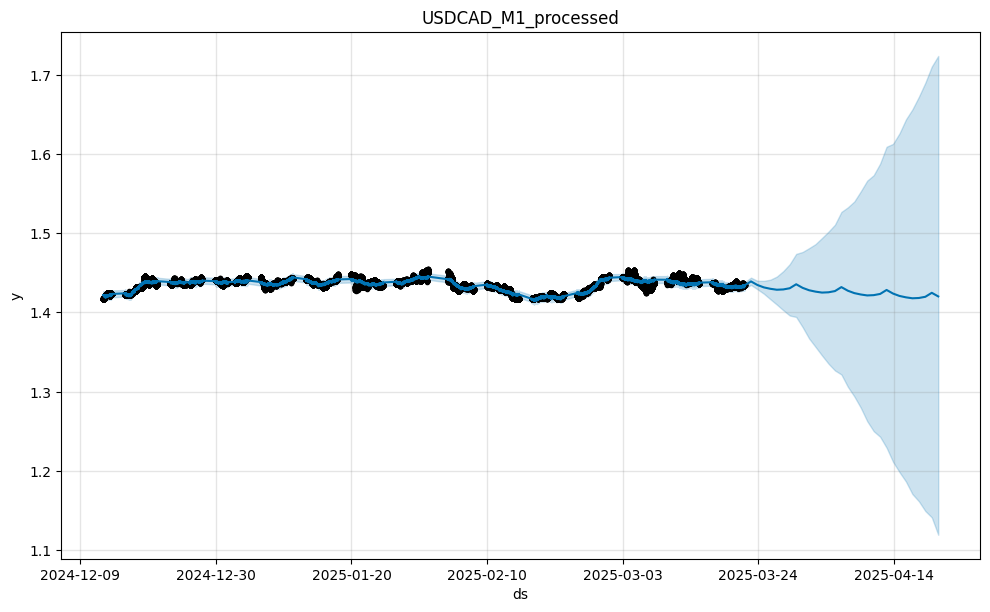

Index(['Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'MA5', 'MA20',
       'MA20_std', 'BB_upper', 'BB_lower', 'Price_Change', 'Price_Change_Pct',
       'Daily_Range', 'Daily_Range_Pct', 'True_Range', 'ATR14', 'RSI14',
       'EMA12', 'EMA26', 'MACD', 'MACD_Signal', 'MACD_Hist'],
      dtype='object')


09:17:09 - cmdstanpy - INFO - Chain [1] start processing
09:19:00 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yusuf\AppData\Local\Temp\ipykernel_5100\3138114131.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)


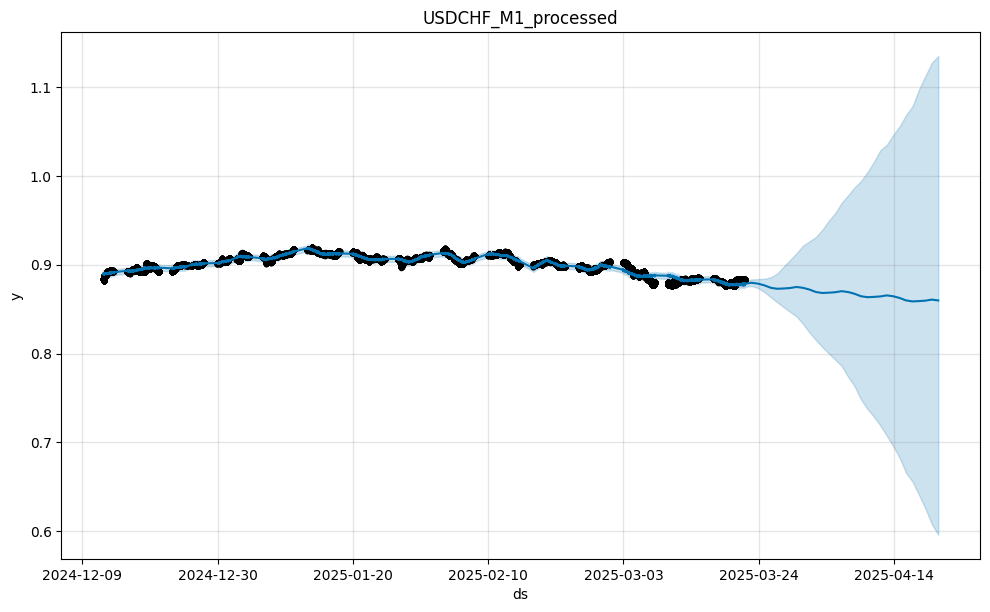

In [ ]:
### lets see if adding more regressors can improve the accuracy of the model
### only adding ATR14 attribute did not changed anything for the model

for name, file in pd_dfs.items():
    if "Time" in file.columns:
        print(file.columns)
        model_df = pd.DataFrame({
            "ds": pd.to_datetime(file["Time"]),
            "y": file["Close"],
            "ATR14": file["ATR14"]
        })
        model = Prophet()

        model.add_regressor("ATR14")

        model.fit(model_df)

        future = model.make_future_dataframe(periods=30)

        last_atr = file["ATR14"].iloc[-1]
        future = future.merge(model_df[["ds", "ATR14"]], on="ds", how="left")
        future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)
        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f"{name}")
        plt.show()
    else:
        print("Error")

In [ ]:
for name, file in pd_dfs.items():
    if "Time" in file.columns:
        print(file.columns)
        model_df = pd.DataFrame({
            "ds": pd.to_datetime(file["Time"]),
            "y": file["Close"],
            "ATR14": file["ATR14"],
            "Volume": file["Volume"]
        })
        model = Prophet()

        model.add_regressor("ATR14")
        model.add_regressor("Volume")

        model.fit(model_df)

        future = model.make_future_dataframe(periods=30)

        last_atr = file["ATR14"].iloc[-1]
        future = future.merge(model_df[["ds", "ATR14"]], on="ds", how="left")
        future["ATR14"] = future["ATR14"].fillna(method="ffill").fillna(last_atr)

        last_atr2 = file["Volume"].iloc[-1]
        future = future.merge(model_df[["ds", "Volume"]], on="ds", how="left")
        future["Volume"] = future["Volume"].fillna(method="ffill").fillna(last_atr2)

        forecast = model.predict(future)

        fig = model.plot(forecast)
        plt.title(f"{name}")
        plt.show()
    else:
        print("Error")


Checking EURUSD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002271428571428, max=0.0120978571428571
RSI14: inf=54, NaN=0, min=-563299.9999963315, max=297899.9999980272
BB_upper: inf=0, NaN=0, min=1.0266702638235188, max=1.07473162488219
BB_lower: inf=0, NaN=0, min=1.0134097982615544, max=1.0495559848921356
Volume: inf=0, NaN=0, min=1, max=370
Price_Change: inf=0, NaN=0, min=-0.02777, max=0.02895


13:14:27 - cmdstanpy - INFO - Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing


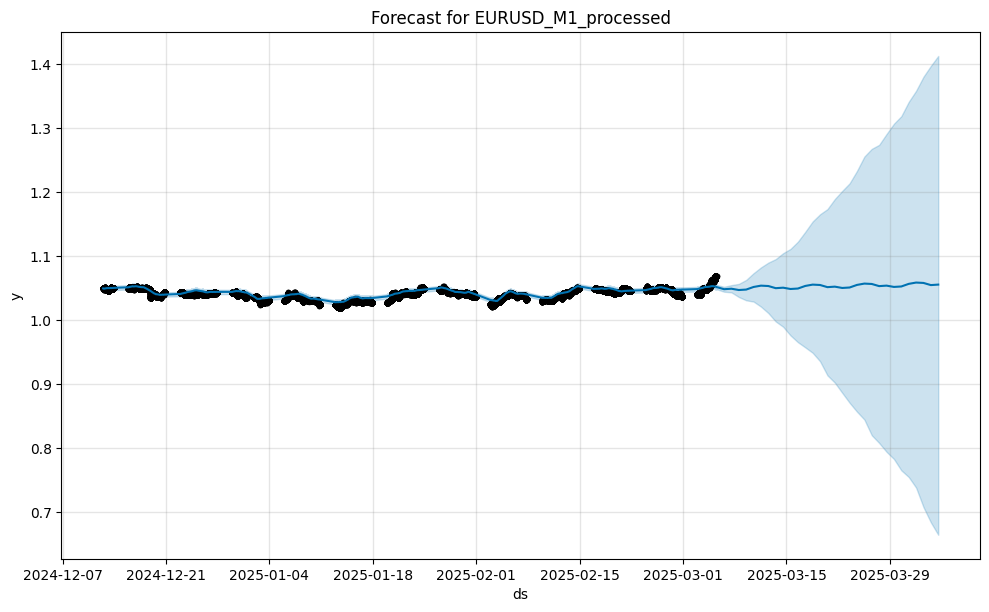


Checking GBPUSD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0003114285714285, max=0.0232371428571428
RSI14: inf=57, NaN=0, min=-467699.9999967696, max=512399.9999966925
BB_upper: inf=0, NaN=0, min=1.2224953154788136, max=1.3320535528697797
BB_lower: inf=0, NaN=0, min=1.1961267429979858, max=1.2972725291563172
Volume: inf=0, NaN=0, min=1, max=276
Price_Change: inf=0, NaN=0, min=-0.05495, max=0.0538800000000001


13:16:23 - cmdstanpy - INFO - Chain [1] start processing
13:18:29 - cmdstanpy - INFO - Chain [1] done processing


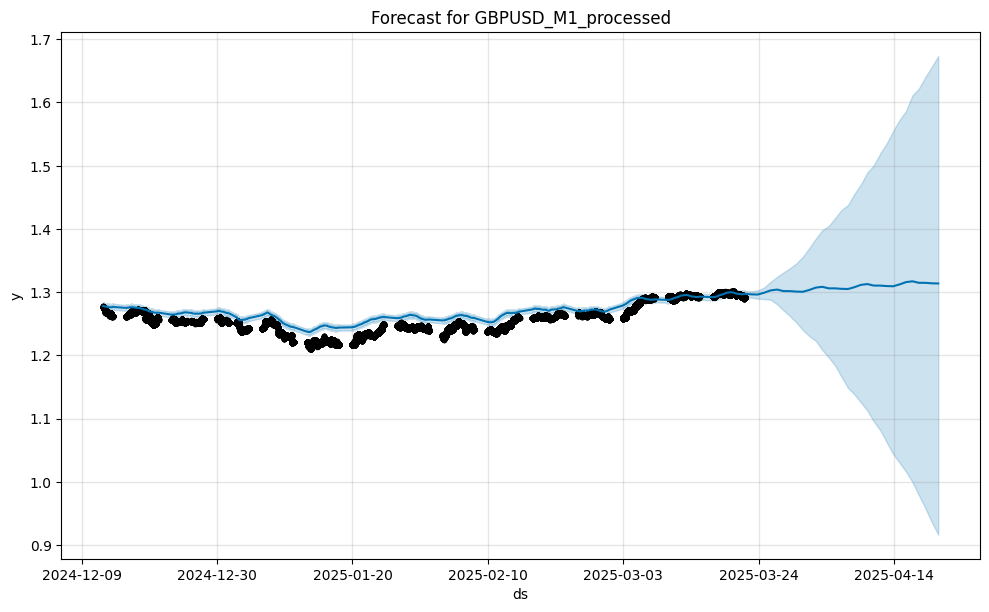


Checking USDCAD_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002435714285714, max=0.0119357142857142
RSI14: inf=46, NaN=0, min=-553300.0000084579, max=182199.9999988005
BB_upper: inf=0, NaN=0, min=1.4193235336997008, max=1.461261626679783
BB_lower: inf=0, NaN=0, min=1.4080267650347524, max=1.443115135802319
Volume: inf=0, NaN=0, min=1, max=324
Price_Change: inf=0, NaN=0, min=-0.0295499999999999, max=0.0274100000000001


13:18:52 - cmdstanpy - INFO - Chain [1] start processing
13:20:47 - cmdstanpy - INFO - Chain [1] done processing


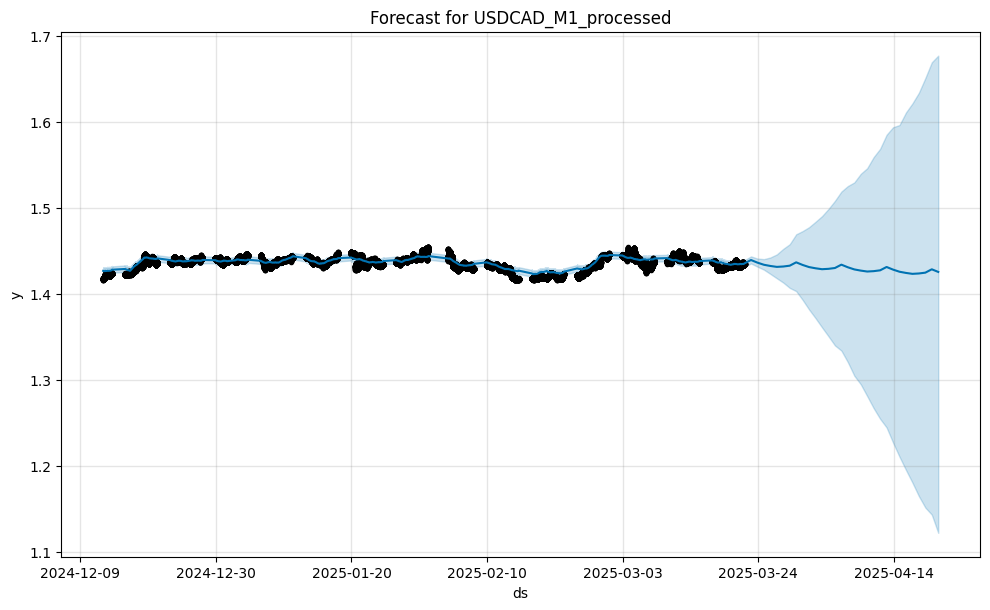


Checking USDCHF_M1_processed for problematic values:
ATR14: inf=0, NaN=0, min=0.0002028571428571, max=0.011205
RSI14: inf=68, NaN=0, min=-273500.0000011557, max=447100.0000018567
BB_upper: inf=0, NaN=0, min=0.8793034987412645, max=0.9283347179477046
BB_lower: inf=0, NaN=0, min=0.8645745963608357, max=0.9153348875076348
Volume: inf=0, NaN=0, min=1, max=212
Price_Change: inf=0, NaN=0, min=-0.0341, max=0.0325699999999999


13:21:09 - cmdstanpy - INFO - Chain [1] start processing


In [ ]:
from sklearn.preprocessing import StandardScaler

for name, file in pd_dfs.items():
    if "Time" in file.columns:
        try:
            regressors = ["ATR14", "RSI14", "BB_upper", "BB_lower", "Volume", "Price_Change"]
            
            print(f"\nChecking {name} for problematic values:")
            for col in regressors:
                inf_count = np.isinf(file[col]).sum()
                nan_count = file[col].isna().sum()
                max_val = file[col].replace([np.inf, -np.inf], np.nan).max()
                min_val = file[col].replace([np.inf, -np.inf], np.nan).min()
                print(f"{col}: inf={inf_count}, NaN={nan_count}, min={min_val}, max={max_val}")

            clean_file = file.copy()

            for col in regressors:
                clean_file[col] = clean_file[col].replace([np.inf, -np.inf], np.nan)

            for col in regressors:
                median_val = clean_file[col].median()
                clean_file[col] = clean_file[col].fillna(median_val)

            scaler = StandardScaler()
            scaled_features = scaler.fit_transform(clean_file[regressors])
            scaled_features_df = pd.DataFrame(scaled_features, columns=regressors)

            model_df = pd.DataFrame({
                "ds": pd.to_datetime(clean_file["Time"]),
                "y": clean_file["Close"]
            })

            for col in regressors:
                model_df[col] = scaled_features_df[col].values

            model = Prophet(changepoint_prior_scale=0.01)
            
            for col in regressors:
                model.add_regressor(col, standardize=False)
                
            model.fit(model_df)

            future = model.make_future_dataframe(periods=30)
            
            for col in regressors:
                future[col] = model_df[col].iloc[-1]
            
            forecast = model.predict(future)
            
            fig = model.plot(forecast)
            plt.title(f"Forecast for {name}")
            plt.show()
            
        except Exception as e:
            print(f"Error processing {name}: {e}")